# <center>Laboratorium 10<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, uzupełnić plik main.py, wykonać test na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

***Materiały przygotowujące:***


In [4]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import scipy.linalg
from numpy.polynomial import polynomial as P

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań nieliniowych lub inaczej mówiąc metodami znajdowania miejsc zerowych funkcji.
W związku z tym podczas zajęć będziemy rozważać następujący problem:

Dana jest funkcja $f(x)$, należy wyznaczyć argumenty funkcji $x$, dla których $f(x) = 0$ (funkcja jest równa zero). 

Argumenty $x^*$, dla których $f(x)=0$ nazywamy *pierwiastkami*.

Funkcja i jej pochodne zostały zaimplementowane w *main.py*

***Zadanie 1.***  
Dany jest wielomian postaci $W(x)=(x-1)(x-2)\cdot \ldots \cdot (x-20)$.

1. Zdefinuj funkcję *polly_A*, która obliczy współczynniki wielomianu $a_i$ w postaci ogólnej wielomianu $w(x)=a_nx^n+\ldots +a_2x^2+a_1x+1$. Skonstruuj wektor tych współczynników. Użyj funkcji [polyfromroots](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polynomial.polynomial.polyfromroots.html#numpy.polynomial.polynomial.polyfromroots) oraz *linspace*.
2. Zdefinuj funkcję *roots_20*, która w pętli 20 iteracji będzie:  

   i. konstruować wektor współczynników nowego wielomianu w następujący sposób: do każdego wygenerowanego wektora współczynników dodać losową wartość w postaci $(10^{-10})N(0,1)$. Użyj funkcji [random_sample](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.random_sample.html#numpy.random.random_sample).  
  ii. wyliczyać pierwiaski tego wielomianu za pomocą metody [polyroots](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polynomial.polynomial.polyroots.html#numpy.polynomial.polynomial.polyroots).

3. Narysuj na wykresie te pierwiastki (w każdej iteracji dorysowywać pierwiastki na tym samym rysunku).

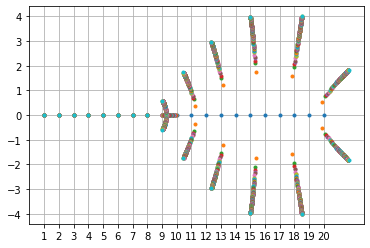

In [25]:
init_poly_roots = np.linspace(1,20,20)
coeff = P.polyfromroots(init_poly_roots)
zeros = init_poly_roots
for i in range(200):
    plt.plot(np.real(zeros),np.imag(zeros),'.')
    coeff, zeros = main.roots_20(coeff)
plt.xticks(init_poly_roots)
plt.grid()
plt.show()

4. Określić, który pierwiastek jest najbardziej wrażliwy na zaburzenia.
    - Najbardziej wrażliwy na zakłócenia (przyjmując za kryterium odległość tego pierwiastka na płaszczyźnie zespolonej od pierwotnej wartości) jest największy pierwiastek 16
5. Zaproponować sposób oszacowania uwarunkowania każdego z pierwiastków.
    - Można badać wpływ małych zakłóceń na odległość na płaszczyźnie zespolonej wyznaczonego pierwiastka od pierwotnego pierwiastka

***Zadanie 2.***  
Dany jest wielomian $w_1(x)=(x-1)^8$. Wyznacz numerycznie miejsca zerowego tego wielomianu poprzez wyznaczenie wartości własnych macierzy Frobeniusa. W związku z tym wykonaj następujące czynności:  

1. Zaiplementuj funkcję tworzącą [macierz Frobenusa](https://github.com/KAIR-ISZ/public_lectures/blob/master/Metody%20Numeryczne%202019/Lecture%204%20(nonlinear%20equations)/Metody%20numeryczne%202019%20-%20R%C3%B3wnania%20nieliniowe.pdf) *frob_a*, dla zadanego wektora współczynników wielomianu $w(x)$.  
2. Wyznacz wartości własne przekształconej macierzy za pomocą funkcji [eigvals](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html#numpy.linalg.eigvals).  
3. Dokonaj rozkładu Schura macierzy zdefiniowanej w punkcie 1. użyj funkcji [schure](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.schur.html#scipy.linalg.schur).  
4. Porównaj wyniki z funkcją polyroots.

In [12]:
wsp = P.polyfromroots([1] * 8)
results = main.frob_a(wsp)
print(results[1])
print(results[2])
print(results[3])


[-4.69153788+0.j          0.2884918 +1.6889081j   0.2884918 -1.6889081j
  0.51507253+0.66306355j  0.51507253-0.66306355j  0.52161447+0.30995694j
  0.52161447-0.30995694j  0.52059013+0.09353964j  0.52059013-0.09353964j]
(array([[-4.69153788e+00, -9.29392730e-01, -1.26194300e+01,
        -3.62081520e+00, -1.39810433e+00, -8.96404714e+00,
         5.75835831e+00,  3.14357808e+01, -1.04825206e+02],
       [ 0.00000000e+00,  2.88491804e-01,  2.91474068e+00,
         7.35782993e-01,  2.84317230e-01,  1.83583546e+00,
        -1.18162698e+00, -6.42990334e+00,  2.14441842e+01],
       [ 0.00000000e+00, -9.78615557e-01,  2.88491804e-01,
         4.28143175e-02,  1.70373135e-02,  1.40385974e-01,
        -9.57679193e-02, -4.72683481e-01,  1.58377721e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         5.15072531e-01, -8.26871955e-01,  1.88374704e-01,
        -2.38299218e-01, -2.48399315e-01,  9.87357290e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         

***Zadanie 3.***  
Dla danego wielomianu $w_2(x) = 243x^7-486x^6+783x^5-990x^4+558x^3-28x^2-72x+16$ wyznacz miejsca zerowe numerycznie, w taki sam sposób jak w zadaniu 2.

In [15]:
wsp2 = np.array([243,-486,783,-990,558,-28,-72,16])
wsp2 = wsp2[1:]/wsp2[1]
results = main.frob_a(wsp)

[ 1.         -1.61111111  2.03703704 -1.14814815  0.05761317  0.14814815
 -0.03292181]


***Zadanie 4.***

Dany jest wielomian: 
$$
w_3(x)= x^5 - 156x^4 - 5x^3 + 780x^2 + 4x - 624
$$.
 Wiedząc, że wielomian ten w postaci szeregu Czebyszewa jest następujący 
 $$w_3(x)= (a_0+\frac{a_2}{2}+ \frac{3a_4}{4})T_0(x)+(a_1+\frac{3a_3}{4}+ \frac{5a_5}{8})T_1(x)+(\frac{a_2}{2}+ \frac{a_4}{4})T_2(x)+(\frac{a_3}{4}+ \frac{5a_5}{16})T_3(x)+ (\frac{a_4}{8})T_4 + (\frac{a_5}{16})T_5(x)$$ 
 znajdź pierwiastki wykorzystując funkcję [chebroots](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.chebyshev.chebroots.html).

In [22]:
a0 = -624
a1 = 4
a2 = 780
a3 = -5
a4 = -156
a5 = 1
t0 = a0+a2/2+3*a4/4
t1 = a1 +3*a3/4+5*a5/8
t2 = a2/2+a4/4
t3 = a3/4+5*a5/16
t4 = a4/8
t5 = a5/16
roots = np.polynomial.chebyshev.chebroots((t0,t1,t2,t3,t4,t5))
print(roots)
roots2 = P.polyroots((a0,a1,a2,a3,a4,a5))
print(roots2)
print(P.polyfromroots(roots))

[ -2.1113158   -1.01778383   1.01798385   2.11432153 155.99679425]
[ -2.  -1.   1.   2. 156.]
[-721.5    4.   858.    -5.  -156.     1. ]
